In [3]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import math as math

In [4]:
df = pd.read_excel('Assignment_1_Data_and_Template.xlsx', sheetname='Data')

/Users/shirleyliu/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [5]:
## Getting the height into inches 
df['total_inches'] = df['Height_Feet'] * 12 + df['Height_Inches']
df.head()

,Height_Feet,Height_Inches,Gender,total_inches
0,5,10,Male,70
1,6,4,Male,76
2,5,10,Male,70
3,5,9,Male,69
4,5,7,Female,67


## Creating my own Histogram

In [6]:
maximum = max(df['total_inches'])
minimum = min(df['total_inches'])
print(maximum, minimum)

83 52


In [7]:
a = np.array([1,2,3])
a - 1

array([0, 1, 2])

In [8]:
def histogram_classifier(X,T,B,xmin,xmax):
    HF = np.zeros(B).astype('int32') 
    HM = np.zeros(B).astype('int32') 
    binindices = (np.round(((B-1) * (X - xmin) / (xmax - xmin)))).astype('int64')
    for i,b in enumerate(binindices):
        if T[i] == 'Female':
            HF[b] += 1
        else: 
            HM[b] += 1
    return [HF, HM]
hist = pd.DataFrame(histogram_classifier(df['total_inches'], df['Gender'], 32, minimum, maximum))


In [9]:
hist.columns = np.arange(52,84)
hist.index = ['female','male']
hist

,52,53,54,55,56,57,58,59,60,61,...,74,75,76,77,78,79,80,81,82,83
female,3,5,12,24,44,101,163,260,404,549,...,20,12,5,0,0,0,0,0,0,0
male,0,0,0,0,0,0,0,0,1,10,...,610,432,274,155,83,38,24,5,3,1


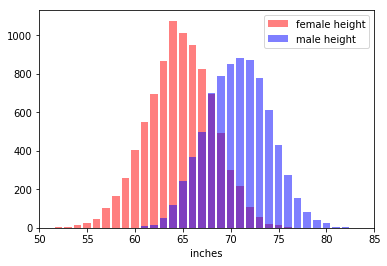

In [10]:
plt.bar(hist.columns,hist.loc['female',:], color = 'red', alpha=0.5)
plt.bar(hist.columns,hist.loc['male',:], color = 'blue', alpha=0.5)
plt.legend(['female height', 'male height'])
plt.xlabel('inches')
plt.show()

# Creating my Histogram Classifier

In [13]:
heights = [55,60,65,70,75,80]

def hist_classifier(dataframe, gender, heights):
    probability_list = []
    for i in heights:
        probability_list.append(dataframe.loc[gender,i] / dataframe.loc[:,i].sum())
    return probability_list

In [14]:
hist_classifier(hist, 'female', heights)

[1.0,
 0.9975308641975309,
 0.8078149920255183,
 0.2604529616724739,
 0.02702702702702703,
 0.0]

# Creating my Bayesian Classifier

## Getting My Parameters

In [15]:
m_total = len(df[df['Gender'] == 'Male'])
f_total = len(df[df['Gender'] == 'Female'])
print(m_total, f_total)

7800 8900


In [16]:
f_mean = df[df['Gender'] == 'Female']['total_inches'].mean()
m_mean = df[df['Gender'] == 'Male']['total_inches'].mean()
print(f_mean, m_mean)

64.72573033707866 70.76807692307692


In [17]:
f_std = df[df['Gender'] == 'Female']['total_inches'].std()
m_std = df[df['Gender'] == 'Male']['total_inches'].std()
print(f_std, m_std)

3.478434480283158 3.3096673675130455


In [18]:
( 1/ np.sqrt(2 * math.pi))

0.3989422804014327

In [22]:
def bayesian_classifier(mu, sig, count, height):
    return count * (( 1/ np.sqrt(2 * math.pi) * sig) * np.exp((-1/2) * (((height - mu) / sig) ** 2)))

bayesian_classifier(f_mean, f_std, f_total, 55)                                 

247.79956754412746

In [23]:
def bayesian(heights, muF, muM, sigF, sigM, m_total, f_total):
    bay_list = []
    for i in heights:
        bay_list.append(bayesian_classifier(muF, sigF, f_total, i)  / (bayesian_classifier(muF, sigF, f_total, i) + bayesian_classifier(muM, sigM, m_total, i)))
    return bay_list    

In [24]:
bayesian(heights, f_mean, m_mean, f_std, m_std, m_total, f_total)

[0.9995106106643138,
 0.989558770820231,
 0.8451717689143626,
 0.28070704480950737,
 0.03347056732386948,
 0.003799644597361561]

## Partial Data - 50 Samples
Here I am doing the same thing with less data

In [117]:
## 50 samples
hist_50_raw = df[0:50]
hist_50 = pd.DataFrame(histogram_classifier(df[0:50]['total_inches'], df[0:50]['Gender'], 32, minimum, maximum))
hist_50.columns = np.arange(52,84)
hist_50.index = ['Female', 'Male']
hist_50

,52,53,54,55,56,57,58,59,60,61,...,74,75,76,77,78,79,80,81,82,83
Female,0,0,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Male,0,0,0,0,0,0,0,0,0,0,...,4,1,2,0,0,0,1,0,0,0


In [127]:
m_total_50 = len(hist_50_raw[hist_50_raw['Gender'] == 'Male'])
f_total_50 = len(hist_50_raw[hist_50_raw['Gender'] == 'Female'])
m_mean_50 = hist_50_raw[hist_50_raw['Gender'] == 'Male']['total_inches'].mean()
f_mean_50 = hist_50_raw[hist_50_raw['Gender'] == 'Female']['total_inches'].mean()
m_std_50 = hist_50_raw[hist_50_raw['Gender'] == 'Male']['total_inches'].std()
f_std_50 = hist_50_raw[hist_50_raw['Gender'] == 'Female']['total_inches'].std()

print(m_total_50, f_total_50, m_mean_50, f_mean_50, m_std_50, f_std_50)

22 28 71.8181818182 64.0714285714 3.45909929973 3.95276341619


In [128]:
hist_classifier(hist_50, 'Female', heights)

/Users/shirleyliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


[1.0, nan, 1.0, 0.0, 0.0, 0.0]

In [129]:
bayesian(heights, f_mean_50, m_mean_50, m_std_50, f_std_50, m_total_50, f_total_50)

[0.99732407346347451,
 0.98345174978128402,
 0.85314713100511086,
 0.25825039827265628,
 0.012630117514608677,
 0.00028803674886421351]

## Observations

* Histogram Classifier works well when data is not sparse. In the full data set, histogram classifer and bayesian produces similar results.
* However, when we use only 50 data points, the data is so sparse, we don't have a lot of signal for male or female for many of the heights. Bayesian however, assuming a PDF, generates results similar to the full data set